# Tutorial 06: Inferential statistics and linear regression with Python

---

## What we talked about last time
- Pandas (data analysis and descriptive statistics)
- Scipy (inferential statistics)

---

## Plan for today
- Inferential statistics with scipy
- Linear regression with sklearn 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

---

## Recap: exercise #1

---

## General steps of hypothesis testing

#### 1. choose a statistic (e.g., mean)
#### 2. specify the null and alternative hypothesis (e.g., mean) -> one-tailed vs two-tailed test
#### 3. sample
#### 4. construct the null distribution, i.e. the sampling distribution around the null hypothesis
#### 5. use the null distribution to compute the p-value of the sample statistic
#### 6. if p-value $< \alpha$ "we have enough evidence to reject the null hypothesis", otherwise "we don't .."  

## Hypothesis testing for one sample

**Over-weight chocolate bars**: You have a chocolate company and the chocolate bars that your company produces are supposed to weight 5 grams. An employee comes to you to report that some of the chocolate bars that he weighted are more than 5 grams usually ("closer to 8 grams" he said). If that is true, the company is hurting from selling more chocolate than it should..

Now, you want to **conduct a test** to see if that is indeed the case.

#### 1. Choose a statistic: 

we are interested in inferring the mean weight of the whole population of chocolate bars. Let's denote it as $\mu$.

#### 2. Specify the null and alternative hypothesis

$$
H_0: \mu = 5
$$

$$
H_A: \mu > 5
$$

#### 3. Sample 

In [2]:
sample = np.array([4, 6.5, 8, 3.5, 5.5, 9, 6, 6.6, 5, 6])

Text(0.5, 0, 'Weight (g)')

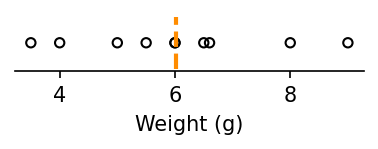

In [3]:
fig, ax = plt.subplots(figsize=(3, .5), dpi=150)

ax.scatter(sample, np.ones(len(sample)), s=20, ec='k', fc="none")
ylim = ax.get_ylim()
ax.vlines(sample.mean(), *ylim, ls='--', color='darkorange', lw=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([]);
ax.set_xlabel("Weight (g)")

#### 4. Construct the null distribution: bootstrap

In [4]:
# center the sample mean to the null mean
null_mean = 5 # what we believe the population mean should be
sample_mean = np.mean(sample)
samples_null = sample - sample_mean + null_mean

Text(0.5, 0, 'Weight (g)')

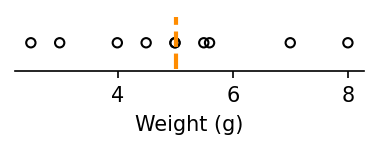

In [5]:
fig, ax = plt.subplots(figsize=(3, .5), dpi=150)

ax.scatter(samples_null, np.ones(len(sample)), s=20, ec='k', fc="none")
ylim = ax.get_ylim()
ax.vlines(samples_null.mean(), *ylim, ls='--', color='darkorange', lw=2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([]);
ax.set_xlabel("Weight (g)")

In [6]:
np.random.seed(42)

resample_means = []
for _ in tqdm(range(100000)):
    
    # draw a new sample (let's call it resample) from the existing sample, with replacement
    resample = np.random.choice(samples_null, size=len(sample), replace=True)
    
    # compute the mean of the resample
    resample_mean = resample.mean()
    
    # keep the computed mean in alist
    resample_means.append(resample_mean) 

100%|██████████| 100000/100000 [00:02<00:00, 42114.74it/s]


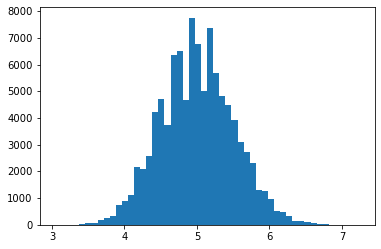

In [7]:
fig, ax = plt.subplots()

ax.hist(resample_means, bins=50);

#### 5. Compute the p-value

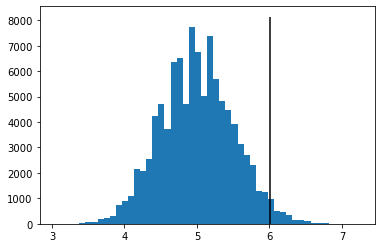

In [8]:
fig, ax = plt.subplots()

ax.hist(resample_means, bins=50);
ylim = ax.get_ylim()
ax.vlines(sample_mean, *ylim, color='k')

In [9]:
(np.array(resample_means) >= sample_mean).mean()

0.02363

#### 6. Concluding statement

Consider a significance level ($\alpha$) of 0.05. Since our (two-tailed) p-value is $< \alpha$, then **we have enough evidence to reject the null hypothesis**.

##### In case of a two-tailed test:

$$
H_A: \mu \neq 200
$$

we need to consider the magnitude of the difference between the null mean and the sample mean and compute the fraction of resample means that:
- either $\leq \mu_0 - |\mu_0 - \bar y| $
- either $\geq \mu_0 + |\mu_0 - \bar y| $

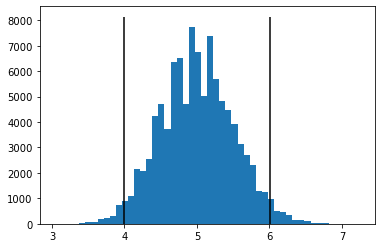

In [10]:
fig, ax = plt.subplots()

ax.hist(resample_means, bins=50);
ylim = ax.get_ylim()
ax.vlines(null_mean + np.abs(sample_mean - null_mean), *ylim, color='k')
ax.vlines(null_mean - np.abs(sample_mean - null_mean), *ylim, color='k')

In [11]:
up = (np.array(resample_means) >= null_mean + np.abs(sample_mean - null_mean)).mean()
lp = (np.array(resample_means) <= null_mean - np.abs(sample_mean - null_mean)).mean()

up + lp

0.04049

We again would reject the null hypothesis.

## Exercise #2

---

## Hypothesis testing for two independent samples

**A diet that works faster?**: Your team of nutrition scientists have worked day an night for the past 6 months to produce your startup's very first product: a new diet. They claim that if people combine this new diet with exercise they will achieve their ideal weight 2 months earlier (on average) than people who only do the exercise. 

Well, it's time to put it to test.

#### 1. Choose a statistic: 

we are interested in testing whether the mean time to loose weight is shorter for people that follow the diet compared to the people who don't. For this we need two samples: one sample from people who followed the diet, and another sample from people who did not follow the diet. That is, each sample comes from a different population with mean $\mu_1$ and $\mu_2$, respectively. The question is whether $\mu_1$ and $\mu_2$ are actuallt different.

#### 2. Specify the null and alternative hypothesis

Since our goal is test whether $\mu_1$ and $\mu_2$ are different, we can formulate hour null and alternative hypothesis as follows:

Null hypothesis would state that $\mu_1$ and $\mu_2$ are not different:
$$
H_0: \mu_1 - \mu_2 = 0
$$

The alternative hypothesis (which is what we hope is true) is that $\mu_1$ and $\mu_2$ are indeed different:

$$
H_A: \mu_1 - \mu_2 \neq 0
$$

#### 3. Sample 

In [12]:
sample1 = np.array([5.5, 4.5, 5, 6.5, 7.5, 5.7, 4.6, 4.3, 5, 5.2])
sample2 = np.array([5, 6.5, 6, 7.5, 7, 6.7, 5.6, 6.6, 4.5, 6.2])

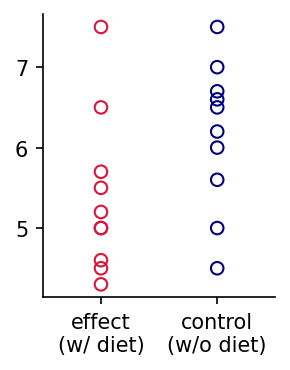

In [13]:
fig, ax = plt.subplots(figsize=(2, 2.5), dpi=150)


ax.scatter(np.zeros(len(sample1)), sample1, ec='crimson', fc='none')
ax.scatter(np.ones(len(sample2)), sample2, ec='navy', fc='none')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xticks([0, 1])
ax.set_xticklabels(["effect\n(w/ diet)", "control\n(w/o diet)"])
ax.set_xlim(-.5, 1.5);

#### 4. Construct the null distribution: randomization (permutation) test

In [14]:
np.random.seed(42)

both_samples = np.concatenate((sample1, sample2))

diffs_of_means = []
for _ in tqdm(range(100000)):
    
    # creating a new sample from each population by shuffling the labels
    
    resample = np.random.choice(both_samples, size=len(both_samples), replace=True)
    resample1 = resample[:len(sample1)]
    resample2 = resample[len(sample1):]
    
    diff_of_means = resample1.mean() - resample2.mean()
    diffs_of_means.append(diff_of_means)

100%|██████████| 100000/100000 [00:04<00:00, 24018.57it/s]


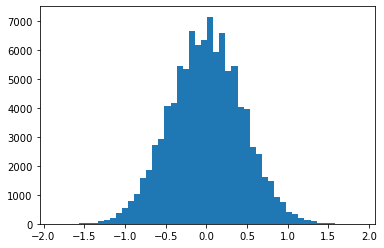

In [15]:
fig, ax = plt.subplots()

ax.hist(diffs_of_means, bins=50);

#### 5. Compute the p-value

In [16]:
null_mean = 0

In [17]:
abs_sample_diff_of_means = np.abs(sample1.mean() - sample2.mean())
abs_sample_diff_of_means

0.7800000000000002

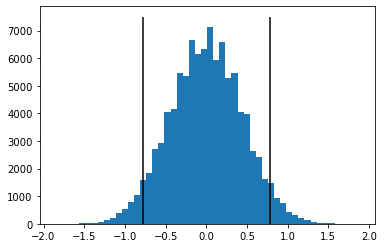

In [18]:
fig, ax = plt.subplots()

ax.hist(diffs_of_means, bins=50);
ylim = ax.get_ylim()
ax.vlines(null_mean + abs_sample_diff_of_means, *ylim, color='k')
ax.vlines(null_mean - abs_sample_diff_of_means, *ylim, color='k')

In [19]:
up = (np.array(diffs_of_means) >= null_mean + abs_sample_diff_of_means).mean()
lp = (np.array(diffs_of_means) <= null_mean - abs_sample_diff_of_means).mean()

up + lp

0.07808999999999999

Unfortuantely, looks like the scientist would need to keep working, and the first product will be delayed..

---

## Linear regression with sklearn

Imagine we have the following data, consisting of the independent variable (x-axis) and dependent variable (y-axis)

In [20]:
x = np.arange(100)
m = 2
c = 5
y = m*x + c + np.random.randn(len(x)) * 40

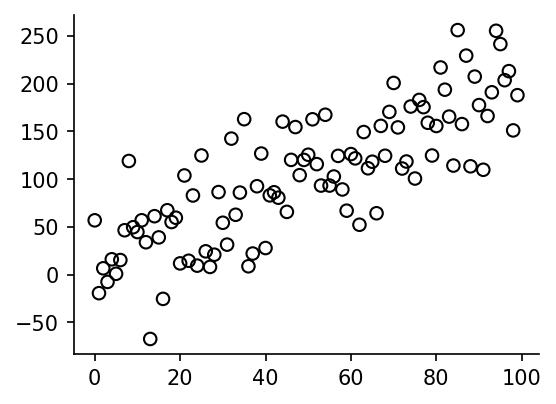

In [21]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

ax.scatter(x, y, ec='k', fc='none')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

How do we find the slope and the intercept?

#### 1. Using Pseudoinverse

In [22]:
X = np.hstack((np.ones((len(x), 1)), x[:, None]))

In [23]:
Y = y[:, None]

In [24]:
np.linalg.inv(X.T @ X) @ X.T @ Y

array([[10.30250707],
       [ 1.90145747]])

#### 2. Using sklearn

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
model = LinearRegression()

In [27]:
model.fit(x[:, None], y)

LinearRegression()

In [28]:
model.coef_, m

(array([1.90145747]), 2)

In [29]:
model.intercept_, c

(10.302507070641369, 5)

In [30]:
x = np.arange(100)
m = 2
c = 5
y_fit = model.coef_*x + model.intercept_

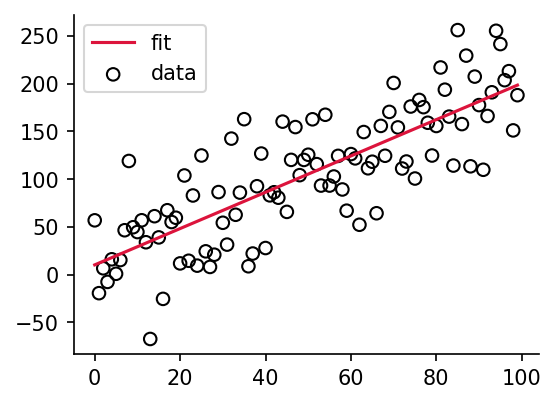

In [31]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)

ax.scatter(x, y, ec='k', fc='none', label="data")
ax.plot(x, y_fit, c='crimson', label="fit")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()

## Exercise #3